# Minimal code for a single F layer solution using our tooling

Here we calculate everything but avoid the outer self consistent loop

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import feo_thermodynamics as feot
import earth_model
import layer_setup

In [2]:
# Flayer setup
f_layer_thickness = 200_000 # m
delta_t_icb = 50 # K below projected adiabat
xfe_outer_core = 1.0 - 0.17 # mol frac Fe
xfe_icb = 0.949 # mol frac Fe

# Transport and growth properties
growth_prefactor = 150.0 # (k0) m/s
chemical_diffusivity = 1.0e-9
thermal_conductivity = 100.0
kinematic_viscosity = 1.0e-6

# Nucleation
i0 = 1.0e-10 # (I0) # s^-1m^-3
surf_energy = 1.08e-2 # (gamma) J/m^2
wetting_angle = 180.0 # degrees

# Numerics
number_of_analysis_points = 100
number_of_knots = 5

# Sensible defaults below
hetrogeneous_radius=None
r_icb=1221.5E3
r_cmb=3480.0E3
gruneisen_parameter=1.5
start_time=0.0
max_time=1.0E12
max_rel_error=1.0E-5
max_absolute_error=1.0E-8
verbose=False
opt_mode='both'

In [3]:
# Setup the f-layer

# Derived radii
r_flayer_top = r_icb + f_layer_thickness
        
# Discretisation points
nucleation_radii = np.linspace(r_icb, r_flayer_top, number_of_analysis_points)
analysis_radii = np.linspace(r_icb, r_flayer_top, number_of_analysis_points)
knott_radii = np.linspace(r_icb, r_flayer_top, number_of_knots)

temperature_function, adiabatic_temperature_function, flayer_temperature_function, t_func_creator, composition_function, \
        pressure_function, gravity_function, x_func_creator = layer_setup.setup_flayer_functions(r_icb, r_cmb, f_layer_thickness, 
                                                      gruneisen_parameter, delta_t_icb, xfe_outer_core, xfe_icb, knott_radii)

/Users/andreww/miniforge3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in find_liquidus (vectorized)
  outputs = ufunc(*inputs)


In [4]:
rs = np.linspace(r_icb, r_flayer_top+100.0E3)

# Check PREM works ... and print some interesting values
prem = earth_model.Prem()
print("Pressure at ICB:", prem.pressure(r_icb/1000.0), "GPa")
print("Pressure at top of F-layer", prem.pressure(r_flayer_top/1000.0), "GPa")
print("g at ICB:", prem.gravity(r_icb/1000.0), "m/s**2")
print("g at top of F-layer", prem.gravity(r_flayer_top/1000.0), "m/s**2")

# Find the liquidus
tl = feot.find_liquidus(composition_function(rs), pressure_function(rs))

# Find the liquid density

liquid_density, _, _, solid_density, _, _ = feot.densities(composition_function(rs), pressure_function(rs),
                                                           temperature_function(rs))

# This is for a well mixed core extended down 
adiabatic_liquid_density, _, _, adiabatic_solid_density, _, _ = feot.densities(xfe_outer_core, pressure_function(rs), 
                                                                               adiabatic_temperature_function(rs))

print("Liquid density at ICB:", liquid_density[0], "Kg/m^3")
print("Liquid density at top of F-layer", liquid_density[-1], "Kg/m^3")
print("Liquid density along adiabat at ICB:", adiabatic_liquid_density[0], "Kg/m^3")
print("Liquid density along adiabat at top of F-layer", adiabatic_liquid_density[-1], "Kg/m^3")

Pressure at ICB: 329.1010089948369 GPa
Pressure at top of F-layer 317.7026904318656 GPa
g at ICB: 4.403124222842614 m/s**2
g at top of F-layer 5.010242771751181 m/s**2
Liquid density at ICB: 13169.58380200067 Kg/m^3
Liquid density at top of F-layer 12571.912798104033 Kg/m^3
Liquid density along adiabat at ICB: 12764.931169768386 Kg/m^3
Liquid density along adiabat at top of F-layer 12571.912798104033 Kg/m^3


In [5]:
temperature_function = layer_setup.fit_quad_func_boundaries(r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)+40.0, adiabatic_temperature_function(r_flayer_top))

In [6]:
composition_function = layer_setup.fit_quad_func_boundaries(r_icb, r_flayer_top, xfe_outer_core+0.01 , xfe_outer_core)

Pressure at ICB: 329.1010089948369 GPa
Pressure at top of F-layer 317.7026904318656 GPa
g at ICB: 4.403124222842614 m/s**2
g at top of F-layer 5.010242771751181 m/s**2


/Users/andreww/miniforge3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in find_liquidus (vectorized)
  outputs = ufunc(*inputs)


Liquid density at ICB: 12792.534318523183 Kg/m^3
Liquid density at top of F-layer 12542.509302676566 Kg/m^3
Liquid density along adiabat at ICB: 12764.931169768386 Kg/m^3
Liquid density along adiabat at top of F-layer 12571.912798104033 Kg/m^3


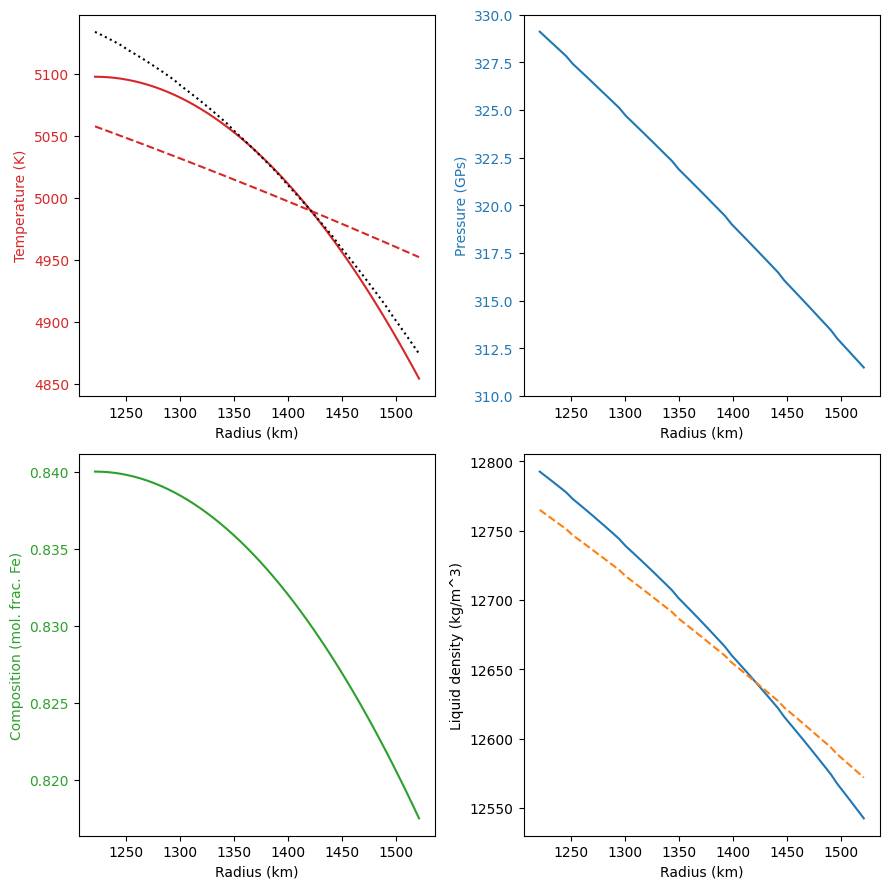

In [8]:
rs = np.linspace(r_icb, r_flayer_top+100.0E3)

# Check PREM works ... and print some interesting values
prem = earth_model.Prem()
print("Pressure at ICB:", prem.pressure(r_icb/1000.0), "GPa")
print("Pressure at top of F-layer", prem.pressure(r_flayer_top/1000.0), "GPa")
print("g at ICB:", prem.gravity(r_icb/1000.0), "m/s**2")
print("g at top of F-layer", prem.gravity(r_flayer_top/1000.0), "m/s**2")

# Find the liquidus
tl = feot.find_liquidus(composition_function(rs), pressure_function(rs))

# Find the liquid density

liquid_density, _, _, solid_density, _, _ = feot.densities(composition_function(rs), pressure_function(rs),
                                                           temperature_function(rs))

# This is for a well mixed core extended down 
adiabatic_liquid_density, _, _, adiabatic_solid_density, _, _ = feot.densities(xfe_outer_core, pressure_function(rs), 
                                                                               adiabatic_temperature_function(rs))

print("Liquid density at ICB:", liquid_density[0], "Kg/m^3")
print("Liquid density at top of F-layer", liquid_density[-1], "Kg/m^3")
print("Liquid density along adiabat at ICB:", adiabatic_liquid_density[0], "Kg/m^3")
print("Liquid density along adiabat at top of F-layer", adiabatic_liquid_density[-1], "Kg/m^3")


# Plot the F-layer setup alongside the liquidus
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(9,9), tight_layout=True)

color = 'tab:red'
ax1.set_xlabel('Radius (km)')
ax1.set_ylabel('Temperature (K)', color=color)
ax1.plot(rs/1000.0, temperature_function(rs), color=color)
ax1.plot(rs/1000.0, adiabatic_temperature_function(rs), color=color, ls='--')
ax1.plot(rs/1000.0, tl, color='k', ls=':')

ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim([5900, 6200])
 

color = 'tab:blue'
ax2.set_xlabel('Radius (km)')
ax2.set_ylabel('Pressure (GPs)', color=color)  
ax2.plot(rs/1000.0, pressure_function(rs), color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([310, 330])

color = 'tab:green'
ax3.set_xlabel('Radius (km)')
ax3.set_ylabel('Composition (mol. frac. Fe)', color=color)  
ax3.plot(rs/1000.0, composition_function(rs), color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4.set_xlabel('Radius (km)')
ax4.set_ylabel('Liquid density (kg/m^3)')  
ax4.plot(rs/1000.0, liquid_density)
ax4.plot(rs/1000.0, adiabatic_liquid_density, ls='--')
#ax4.plot(rs/1000.0, solid_density, ls=':')
ax4.tick_params(axis='y')

fig.tight_layout()  
plt.show()

In [9]:
Nbv, N2 = layer_setup.estimate_brunt_vaisala_frequency(r_flayer_top, r_icb, temperature_function, adiabatic_temperature_function,
                                             composition_function, gravity_function, pressure_function)
print(f"BV freq = {Nbv}")

BV freq = 0.00022590837386311853


In [10]:
import flayer

In [11]:
k0 = 150.0
dl = 1.0E-9
k = 100.0
mu = 1.0E-6
i0 = 1.0E-10
surf_energy = 1.08E-2
wetting_angle = 180.0
hetrogeneous_radius = None

solutions, particle_densities, growth_rate, solid_vf, \
        particle_radius_unnormalised, partial_particle_densities, \
        crit_nuc_radii, nucleation_rates, t_points_out, xl_points_out, total_latent_heat, total_o_rate =flayer.evaluate_flayer(
    temperature_function, composition_function, pressure_function, gravity_function, 0.0, 1.0E20,
                    k0, dl, k, mu, i0, surf_energy, wetting_angle, hetrogeneous_radius,
                    nucleation_radii, analysis_radii, r_icb, 
                    r_flayer_top, verbose=False, silent=False)

print(f"Heat from crystalisation = {total_latent_heat/1.0E12} TW, oxygen = {total_o_rate/1.0E9} Tg/s")

Nucleation calculation
Prefactor: 1e-10 s^-1 m^-3, surface energy 0.0108
Homogenious nucleation
Radius (km), P (GPa), T (K), X (mol. frac Fe), I (s^-1m^-3), r0 (m)
1221.5 329.101 5097.51 0.84 9.55e-11 2.66e-10
1241.7 328.024 5096.4 0.84 9.28e-11 3.41e-10
1261.9 326.939 5093.09 0.84 8.76e-11 4.53e-10
1282.11 325.758 5087.57 0.839 7.57e-11 6.57e-10
1302.31 324.644 5079.85 0.838 5.27e-11 9.96e-10
1322.51 323.516 5069.92 0.837 1.55e-11 1.7e-09
1342.71 322.37 5057.78 0.836 1.69e-14 3.66e-09
1362.91 321.214 5043.43 0.835 2.65e-76 1.52e-08
1383.12 319.963 5026.88 0.833 nan nan
1403.32 318.78 5008.12 0.832 nan nan
Finding 100 IVP solutions


/Users/andreww/Code/slurry/falling.py:186: RuntimeWarning: invalid value encountered in double_scalars
  delta_u_prefac_low_fr = (fr/1.0e-2)**(-0.5)
/Users/andreww/Code/slurry/falling.py:187: RuntimeWarning: invalid value encountered in double_scalars
  delta_u_low_fr = delta_u_prefac_low_fr * (fr/re)**(0.5) * 2.0 * radius # above eq I3.11
/Users/andreww/Code/slurry/falling.py:188: RuntimeWarning: invalid value encountered in double_scalars
  delta_c_prefac_low_fr = (1.0E-2)**(1/6) * (1.0E-2*sc)**(1/3) * fr**(-1/6)
/Users/andreww/Code/slurry/falling.py:189: RuntimeWarning: invalid value encountered in double_scalars
  delta_c_low_fr = delta_c_prefac_low_fr * fr**(1/6) / (re**(1/6) * pe_c**(1/3)) * 2.0 * radius # eq I3.12
/Users/andreww/Code/slurry/flayer.py:484: RuntimeWarning: invalid value encountered in divide
  mean_particle_velocities[i] = np.mean((partial_densities * partial_velocities) /


Radius (km), P (GPa), Guess T (K), Guess X, dm/dt (kg/s), Q (W/m^3), O prod rate
1221.5 329.101 5097.51 0.84 0 0 0
1241.7 328.024 5096.4 0.839898 5.44e-11 4.08e-05 2.38e-12
1261.9 326.939 5093.09 0.839592 1.87e-11 1.4e-05 8.21e-13
1282.11 325.758 5087.57 0.839082 4.79e-12 3.59e-06 2.11e-13
1302.31 324.644 5079.85 0.838368 6.93e-13 5.2e-07 3.07e-14
1322.51 323.516 5069.92 0.837449 2.37e-14 1.78e-08 1.05e-15
1342.71 322.37 5057.78 0.836327 3.49e-19 2.62e-13 1.56e-20
1362.91 321.214 5043.43 0.835001 2.35e-80 1.76e-74 1.06e-81
1383.12 319.963 5026.88 0.83347 0 0 0
1403.32 318.78 5008.12 0.831736 0 0 0
Heat from crystalisation = 4.0103212827725745 TW, oxygen = 0.00023457700315182993 Tg/s


So - what we are going to do is:

1. sum up Q
2. Match total Q with heat flux out of CMB. This gives us an upper bound on what Q can be, as we should add the secular cooling and the gravitational mixing from  light emement release. However, an upper bound is probably all we need as the constraint will be strong!
